In [1]:
from mrsimulator import Simulator, SpinSystem, Site, Dimension
from mrsimulator import SymmetricTensor as st
from mrsimulator.methods import one_d_spectrum

In [2]:
import matplotlib.pyplot as plt
def plot(x, y):
    plt.figure(figsize=(4, 3))
    plt.plot(x, y, linewidth=1)
    plt.xlim([x.value.max(), x.value.min()])
    plt.xlabel(f"frequency ratio / {str(x.unit)}")
    plt.grid(color='gray', linestyle='--', linewidth=1.0, alpha=0.25)
    plt.tight_layout(h_pad=0, w_pad=0, pad=0)

# Potassium Sulfate

The following example is a $^{33}$S NMR lineshape simulation of potassium sulfate (K$_2$SO$_4$). The quadrupole tensor parameters for $^{33}$S is obtained from [Moudrakovski et. al.](https://pubs.acs.org/doi/10.1021/jp908206c)

**Step 1** Create sites, in this case, just the one.

In [3]:
S33 = Site(
    name='33S',
    isotope='33S',
    isotropic_chemical_shift=335.7,
    quadrupolar=st(Cq=0.959e6, eta=0.42)
)

**Step 2** Create spin systems from this site.

In [4]:
spin_systems = SpinSystem(sites=[S33])

**Step 3** Create a dimension.

In [5]:
dimension = Dimension(
    isotope='33S',
    magnetic_flux_density=21.14, # in T
    number_of_points=2048,
    spectral_width=5000, # in T
    reference_offset=22500, # in T
    rotor_frequency=14000 # in T
)

**Step 4** Create the Simulator object and add dimension and isotopomer object.

In [6]:
sim_K2SO3 = Simulator()
sim_K2SO3.spin_systems += [spin_systems]
sim_K2SO3.dimensions += [dimension]

**Step 5** Simulate and plot.

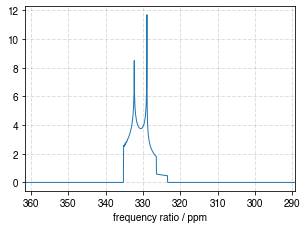

In [7]:
x, y = sim_K2SO3.run(method=one_d_spectrum)
plot(x,y)
plt.show()